In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import scipy.ndimage

In [3]:
IDR_data = np.genfromtxt('./feature_data/IDR_data.csv',delimiter=',',skip_header=1)
folded_data = np.genfromtxt('./feature_data/folded_data.csv',delimiter=',',skip_header=1)
NTD_data = np.genfromtxt('./feature_data/NTD_data.csv',delimiter=',',skip_header=1)

Text(0, 0.5, 'Fraction of Charged Residue')

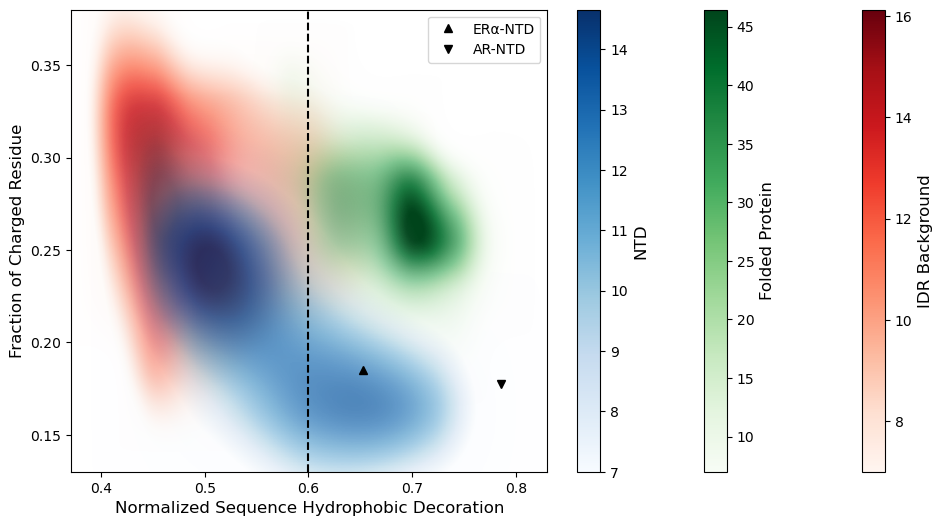

In [4]:
fig, ax = plt.subplots(figsize=(12,6))
interpolation = 'catrom'
cutoff = 7

stat = np.histogram2d(IDR_data[:,1], IDR_data[:,0], bins=20, density=True)
x = (stat[1][1:]+stat[1][:-1])/2
y = (stat[2][1:]+stat[2][:-1])/2
alphas = stat[0].T / np.max(stat[0])
alphas[np.where(stat[0].T<cutoff)] = 0
IDR = ax.imshow(stat[0].T, cmap='Reds', origin='lower', interpolation=interpolation, extent=[x[0], x[-1], y[0], y[-1]], aspect='auto', vmin=cutoff, alpha=alphas)
bar1 = plt.colorbar(IDR)
bar1.set_label('IDR Background', fontsize=12)

stat = np.histogram2d(folded_data[:,1], folded_data[:,0], bins=12, density=True)
x = (stat[1][1:]+stat[1][:-1])/2
y = (stat[2][1:]+stat[2][:-1])/2
alphas = stat[0].T / np.max(stat[0])
alphas[np.where(stat[0].T<cutoff)] = 0
folded = ax.imshow(stat[0].T, cmap='Greens', origin='lower', interpolation=interpolation, extent=[x[0], x[-1], y[0], y[-1]], aspect='auto', vmin=cutoff, alpha=alphas)
bar1 = plt.colorbar(folded)
bar1.set_label('Folded Protein', fontsize=12)

bins = 5
stat = np.histogram2d(NTD_data[:,1], NTD_data[:,0], bins=bins, density=True)
x = (stat[1][1:]+stat[1][:-1])/2
y = (stat[2][1:]+stat[2][:-1])/2
x_b =np.hstack([[2*x[0]-x[1]],x, [2*x[-1]-x[-2]]])
y_b =np.hstack([[2*y[0]-y[1]],x, [2*y[-1]-y[-2]]])
stat_a = np.hstack([np.zeros((bins,1)),stat[0], np.zeros((bins,1))])
stat_b = np.vstack([np.zeros((1,bins+2)),stat_a, np.zeros((1,bins+2))])
alphas = stat_b.T / np.max(stat_b)
alphas[np.where(stat_b.T<cutoff)] = 0
NTD = ax.imshow(stat_b.T, cmap='Blues', origin='lower', interpolation=interpolation, extent=[x_b[0], x_b[-1], y_b[0], y_b[-1]], aspect='auto', vmin=cutoff, alpha=alphas*0.8)
bar3 = plt.colorbar(NTD)
bar3.set_label('NTD', fontsize=12)
plt.axis([3.8/10.23464191566815, 8.5/10.23464191566815, 0.13, 0.38])

ax.plot(np.array(NTD_data)[33,1], np.array(NTD_data)[33,0], '^', color='black', label='ERα-NTD')
ax.plot(np.array(NTD_data)[38,1], np.array(NTD_data)[38,0], 'v', color='black', label='AR-NTD')
ax.vlines(0.6, 0.13, 0.38, linestyle='--', color='black')
plt.legend()
plt.xlabel('Normalized Sequence Hydrophobic Decoration', fontsize=12)
plt.ylabel('Fraction of Charged Residue', fontsize=12)
#plt.savefig('FCR_SHD_plot.pdf')